In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/play_by_play_fbs_regular_all.csv")

In [3]:
df.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,game_id,...,defense_timeouts,yard_line,yards_to_goal,down,distance,scoring,yards_gained,play_type,play_text,ppa
0,252462005002,Washington,Pac-10,Air Force,Mountain West,Air Force,Washington,0,0,252462005,...,NaN,75,75,1,10,False,0,Rush,"Louis Rankin rush for 2 yards to the Wash27, c...",-0.702970
1,252462005003,Washington,Pac-10,Air Force,Mountain West,Air Force,Washington,0,0,252462005,...,NaN,73,73,2,8,False,0,Rush,"Louis Rankin rush for 6 yards to the Wash33, c...",-0.478808
2,252462005004,Washington,Pac-10,Air Force,Mountain West,Air Force,Washington,0,0,252462005,...,NaN,67,67,3,2,False,0,Rush,Isaiah Stanback rush for loss of 1 yard to the...,-0.601314
3,252462005005,Washington,Pac-10,Air Force,Mountain West,Air Force,Washington,0,0,252462005,...,NaN,68,68,4,3,False,0,Punt,"Felix Sweetman punt 49 yards to the AFA19, Jac...",NaN
4,252462005006,Air Force,Mountain West,Washington,Pac-10,Air Force,Washington,0,0,252462005,...,NaN,31,69,1,10,False,0,Pass,Shaun Carney pass complete to Greg Kirkwood fo...,-0.894781


In [5]:
list(df.columns)

['id',
 'offense',
 'offense_conference',
 'defense',
 'defense_conference',
 'home',
 'away',
 'offense_score',
 'defense_score',
 'game_id',
 'drive_id',
 'drive_number',
 'play_number',
 'period',
 'clock',
 'offense_timeouts',
 'defense_timeouts',
 'yard_line',
 'yards_to_goal',
 'down',
 'distance',
 'scoring',
 'yards_gained',
 'play_type',
 'play_text',
 'ppa']

In [16]:
# gets all MSU offensive plays against Big 10 teams
msu = df[(df['offense'] == 'Michigan State') & (df['defense_conference'] == 'Big Ten')]
msu.head()

,id,offense,offense_conference,defense,defense_conference,home,away,offense_score,defense_score,game_id,...,defense_timeouts,yard_line,yards_to_goal,down,distance,scoring,yards_gained,play_type,play_text,ppa
313709,252670356002,Michigan State,Big Ten,Illinois,Big Ten,Illinois,Michigan State,0,0,252670356,...,NaN,80,80,1,10,False,7,Pass,Drew Stanton pass complete to Jason Teague for...,0.525303
313710,252670356003,Michigan State,Big Ten,Illinois,Big Ten,Illinois,Michigan State,0,0,252670356,...,NaN,73,73,2,3,False,2,Rush,Jason Teague rush for 2 yards to the MSU 29.,-0.531412
313711,252670356004,Michigan State,Big Ten,Illinois,Big Ten,Illinois,Michigan State,0,0,252670356,...,NaN,71,71,3,1,False,0,Rush,"Drew Stanton rush for no gain, fumbled at the ...",-0.561199
313712,252670356005,Michigan State,Big Ten,Illinois,Big Ten,Illinois,Michigan State,0,0,252670356,...,NaN,71,71,4,1,False,0,Punt,Brandon Fields punt for 39 yards downed at the...,NaN
313717,252670356010,Michigan State,Big Ten,Illinois,Big Ten,Illinois,Michigan State,6,0,252670356,...,NaN,75,75,1,10,True,75,Pass,Drew Stanton pass complete to Kyle Brown for 7...,NaN


In [30]:
# pass, rush, punt, or Field Goal
primary_plays = msu[(msu['play_type'] == 'Pass') | (msu['play_type'] == 'Rush') | (msu['play_type'] == 'Punt') | (msu['play_type'] == 'Field Goal Good') | (msu['play_type'] == 'Field Goal Missed') | (msu['play_type'] == 'Field Goal Blocked')]

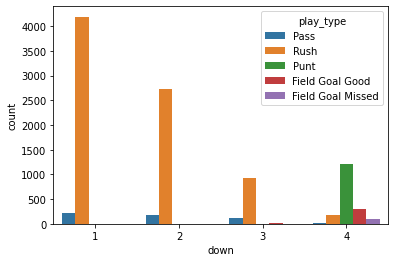

In [31]:
plays_on_downs = sns.countplot(x="down", hue="play_type", data=primary_plays)

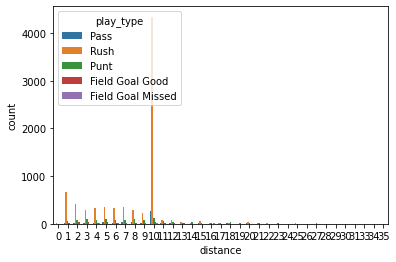

In [32]:
plays_on_distance = sns.countplot(x="distance", hue="play_type", data=primary_plays)

In [33]:
msu.describe()

,id,offense_score,defense_score,game_id,drive_id,drive_number,play_number,period,offense_timeouts,defense_timeouts,yard_line,yards_to_goal,down,distance,yards_gained,ppa
count,2.154100e+04,21541.000000,21541.000000,2.154100e+04,2.154100e+04,21541.000000,21541.000000,21541.000000,10253.000000,10253.000000,21541.000000,21541.000000,21541.000000,21541.000000,21541.000000,15915.000000
mean,1.660950e+17,12.510840,11.722297,3.376502e+08,2.849080e+10,13.431178,5.044520,2.537719,2.634058,2.580708,49.432756,50.069124,1.855253,7.971821,5.845504,0.072930
std,1.974798e+17,11.295254,11.293322,5.671482e+07,1.131140e+10,7.753411,3.492666,1.128647,0.701219,0.736331,24.798420,24.804811,1.209539,4.716591,10.452337,1.163655
min,2.526704e+11,0.000000,0.000000,2.526704e+08,4.005479e+09,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-10.000000,-76.000000,-8.458415
25%,2.831301e+11,3.000000,3.000000,2.831301e+08,2.630801e+10,7.000000,2.000000,2.000000,2.000000,2.000000,30.000000,31.000000,1.000000,5.000000,0.000000,-0.626805
50%,3.230801e+11,10.000000,7.000000,3.230801e+08,3.029601e+10,13.000000,4.000000,2.000000,3.000000,3.000000,50.000000,54.000000,2.000000,10.000000,2.000000,-0.168466
75%,4.008697e+17,20.000000,17.000000,4.008697e+08,4.005480e+10,20.000000,7.000000,4.000000,3.000000,3.000000,69.000000,70.000000,3.000000,10.000000,8.000000,0.605973
max,4.011122e+17,61.000000,54.000000,4.011122e+08,4.011122e+10,36.000000,24.000000,7.000000,3.000000,3.000000,100.000000,100.000000,5.000000,65.000000,95.000000,7.033900


In [34]:
pass_or_rush = msu[(msu['play_type'] == 'Pass') | (msu['play_type'] == 'Rush')]

In [36]:
pass_or_rush.describe()

,id,offense_score,defense_score,game_id,drive_id,drive_number,play_number,period,offense_timeouts,defense_timeouts,yard_line,yards_to_goal,down,distance,yards_gained,ppa
count,8.569000e+03,8569.000000,8569.000000,8.569000e+03,8.569000e+03,8569.000000,8569.000000,8569.000000,3863.000000,3863.000000,8569.000000,8569.000000,8569.000000,8569.000000,8569.000000,8163.000000
mean,1.528351e+17,12.994749,10.775937,3.321511e+08,2.818376e+10,13.271794,4.391644,2.519197,2.736474,2.611701,49.990197,49.416735,1.649551,8.078656,4.682693,-0.036281
std,1.947121e+17,11.994984,10.520931,5.815388e+07,1.099485e+10,7.883341,3.245115,1.143278,0.564285,0.721704,24.852330,24.845486,0.775786,3.813782,7.444129,0.929283
min,2.526704e+11,0.000000,0.000000,2.526704e+08,4.005479e+09,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-63.000000,-4.592363
25%,2.827101e+11,3.000000,3.000000,2.827101e+08,2.532301e+10,6.000000,2.000000,1.000000,3.000000,2.000000,30.000000,29.000000,1.000000,5.000000,1.000000,-0.538695
50%,3.228701e+11,10.000000,7.000000,3.228701e+08,2.932501e+10,13.000000,4.000000,3.000000,3.000000,3.000000,50.000000,52.000000,1.000000,10.000000,3.000000,-0.166526
75%,4.008696e+17,21.000000,17.000000,4.008696e+08,3.332701e+10,20.000000,6.000000,4.000000,3.000000,3.000000,70.000000,70.000000,2.000000,10.000000,6.000000,0.328712
max,4.011122e+17,61.000000,54.000000,4.011122e+08,4.011122e+10,36.000000,22.000000,6.000000,3.000000,3.000000,99.000000,99.000000,4.000000,35.000000,86.000000,4.430900


In [40]:
pass_or_rush[['yard_line',
 'yards_to_goal',
 'down',
 'distance',
 'scoring',
 'yards_gained',
 'play_type']]

,yard_line,yards_to_goal,down,distance,scoring,yards_gained,play_type
313709,80,80,1,10,False,7,Pass
313710,73,73,2,3,False,2,Rush
313711,71,71,3,1,False,0,Rush
313717,75,75,1,10,True,75,Pass
313732,80,80,1,10,False,21,Rush
...,...,...,...,...,...,...,...
3686213,38,38,2,6,False,0,Rush
3686239,75,75,2,10,False,5,Rush
3686243,69,69,2,4,False,6,Rush
3686263,90,90,1,10,False,3,Rush


In [41]:
first_down = pass_or_rush[pass_or_rush['down'] == 1]
second_down = pass_or_rush[pass_or_rush['down'] == 2]
third_down = pass_or_rush[pass_or_rush['down'] == 3]

In [55]:
# avg yards gained for pass or rush
rushing = []
passing = []

rushing.append(first_down['yards_gained'].mean())
rushing.append(second_down['yards_gained'].mean())
rushing.append(third_down['yards_gained'].mean())

passing.append(first_down['yards_gained'].mean())
passing.append(second_down['yards_gained'].mean())
passing.append(third_down['yards_gained'].mean())

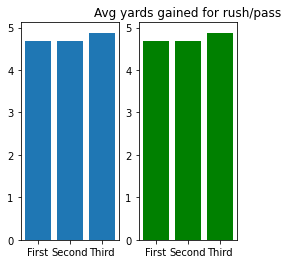

In [72]:
names = ['First', 'Second', 'Third']
values = [np.array(rushing), np.array(passing)]

plt.subplot(131)
plt.bar(names, np.array(rushing))

plt.subplot(132)
plt.bar(names, np.array(passing), color='green')

plt.title('Avg yards gained for rush/pass')
plt.show()


Text(0, 0.5, 'Density')

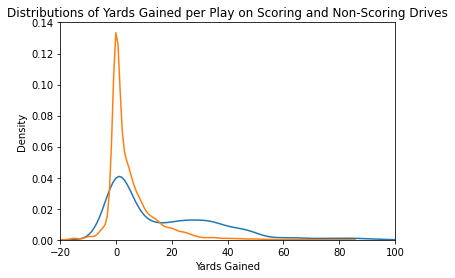

In [73]:
scoring = msu[msu['scoring'] == True]
not_scoring = msu[msu['scoring'] == False]
sns.kdeplot(scoring['yards_gained'], label = 'Scoring Drives')
sns.kdeplot(not_scoring['yards_gained'], label = 'Non-Scoring Drives')
plt.xlim(-20, 100)
plt.title('Distributions of Yards Gained per Play on Scoring and Non-Scoring Drives')
plt.xlabel('Yards Gained')
plt.ylabel('Density')